In [1]:
# xgboost_test
import numpy as np
import pandas as pd
from sklearn import datasets
from xgboost import XGBClassifier,XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error

D:\soft\anaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
D:\soft\anaconda\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [33]:
df = pd.read_excel('C:/Users/Administrator/Desktop/kaisi_ana.xlsx',sheet_name = 'Sheet4')

In [34]:
df.shape

(2236, 35)

In [35]:
df.head().T

,0,1,2,3,4
客户ID,GRUqvkNONFQwjZ4FJfx,JDwt5z1UK3SprmcZwuB,Vi8P2Cd6BaBvzufhBBa,YRanxkhNE0Lkms6D1Hx,PYoPsU84MMCjDOhY3oy
客户Code,C0134657,C0156785,C0172367,C0158081,C0154525
模型给予额度,7,4,9,6,7
最后授信额度,3,4,9,6,2
调降比率,-0.571429,0,0,0,-0.714286
名称,深圳市宝安区宝城车之界汽车美容服务部,深圳市深航汽车维修服务有限公司,甘肃鸿泰达汽车服务有限责任公司,厦门乐途启航汽车服务有限公司环岛路分公司,厦门建安通商汽车服务有限公司
简称,宝城车之界汽车美容服务部,深圳市深航汽车维修服务有限公司,甘肃鸿泰达汽车服务有限责任公司,厦门乐途启航汽车服务有限公司,厦门建安通商汽车服务有限公司
省,广东省,广东省,甘肃省,福建省,福建省
市,深圳市,深圳市,兰州市,厦门市,厦门市
区,宝安区,宝安区,安宁区,思明区,思明区


In [9]:
ll = pd.get_dummies(df[u'客户标签'],prefix='key')
df = pd.concat([df,ll],axis=1)
df

,客户ID,客户Code,模型给予额度,最后授信额度,调降比率,名称,简称,省,市,区,...,期望付款方式,发票要求,老板是否为法人,场地月租金（万）,月人工工资（万),配件采购倾向,USERNAME,key_中端车,key_空,key_高端车
0,GRUqvkNONFQwjZ4FJfx,C0134657,7.0,3.0,-0.571429,深圳市宝安区宝城车之界汽车美容服务部,宝城车之界汽车美容服务部,广东省,深圳市,宝安区,...,月结,部分开发票,Y,2.0,3.0,NaN,张明辉,1,0,0
1,JDwt5z1UK3SprmcZwuB,C0156785,4.0,4.0,0.000000,深圳市深航汽车维修服务有限公司,深圳市深航汽车维修服务有限公司,广东省,深圳市,宝安区,...,月结,不开发票,Y,2.0,2.0,品牌件|原厂件,张明辉,0,0,1
2,Vi8P2Cd6BaBvzufhBBa,C0172367,9.0,9.0,0.000000,甘肃鸿泰达汽车服务有限责任公司,甘肃鸿泰达汽车服务有限责任公司,甘肃省,兰州市,安宁区,...,月结,开发票,Y,0.0,0.0,NaN,董强,0,1,0
3,YRanxkhNE0Lkms6D1Hx,C0158081,6.0,6.0,0.000000,厦门乐途启航汽车服务有限公司环岛路分公司,厦门乐途启航汽车服务有限公司,福建省,厦门市,思明区,...,月结,开发票,Y,0.0,0.0,NaN,汪旭莹,0,1,0
4,PYoPsU84MMCjDOhY3oy,C0154525,7.0,2.0,-0.714286,厦门建安通商汽车服务有限公司,厦门建安通商汽车服务有限公司,福建省,厦门市,思明区,...,NaN,NaN,NaN,0.0,0.0,NaN,汪旭莹,0,1,0
5,nP7CchhQzjiWgKQ2Fb5,C0120060,9.0,9.0,0.000000,南通东徽行汽车科技服务有限公司,南通东徽行汽车科技服务有限公司,江苏省,南通市,通州区,...,月结,部分开发票,Y,0.0,0.0,NaN,李鑫,0,1,0
6,4bNZ4hQhFiR0pc1QDPv,C0114958,6.0,6.0,0.000000,盈德汽车服务有限公司,盈德汽车服务有限公司,江苏省,南通市,崇川区,...,月结,开发票,Y,0.0,0.0,NaN,李鑫,0,1,0
7,7oSCDAtUbs38p3Winmh,C0185906,9.0,9.0,0.000000,南通市宝泽汽车科技服务有限公司,南通市宝泽汽车科技服务有限公司,江苏省,南通市,通州区,...,月结,开发票,Y,0.0,0.0,NaN,李鑫,0,1,0
8,suammr5P75ezvt8QqOV,C0020885,4.3,2.0,-0.534884,佛山市宝盛行汽车维修有限公司,佛山市宝盛行汽车维修有限公司,广东省,佛山市,禅城区,...,NaN,NaN,NaN,0.0,0.0,品牌件|原厂件,戴骐骥,0,1,0
9,hje5x13Y2ZL1aLW9YU5,C0138123,9.0,9.0,0.000000,武汉市捷盛通恒汽车服务有限公司,武汉市捷盛通恒汽车服务有限公司,湖北省,武汉市,洪山区,...,月结,部分开发票,Y,0.0,0.0,NaN,吴凯华,0,1,0


# 特征工程

In [23]:
# one_hot变量
for col in [u'客户标签',u'客户类型',u'维修厂店面面积（平方）',u'期望付款方式',u'发票要求',u'配件采购倾向']:
    str1 = col+u'_空'
    df[col].fillna(str(str1),inplace=True)
    temp = pd.get_dummies(df[col],prefix='key')
    df = pd.concat([df,ll],axis=1)
#     n = df[col].count()
#     ocean = encoder.fit_transform(df[col].values)  
#     ocean = np.array([ocean]).T
#     feature=enc.fit_transform(ocean).toarray()
#     df = pd.concat([df,pd.DataFrame(feature)],axis=1)
#     df = df.rename(columns={i:col+'_'+str(i) for i in range(n)})


# 0-1变量
status_dic = {'Y':1,"1":1,"N":0}
for col in [u'老板是否有4S维修经验',u'是否有独立的财务部门',u'是否有独立的采购人员',u'是否有独立的钣喷房',u'老板是否为法人']:
    df[col].replace(to_replace=status_dic,inplace=True)

In [29]:
df[u'客户标签'].fillna(str(str1),inplace=True)

In [30]:
df[u'客户标签'].value_counts()

客户标签_空    1693
中端车        272
高端车        271
Name: 客户标签, dtype: int64

In [26]:
str1

'配件采购倾向_空'

In [32]:
df.columns

Index(['客户ID', '客户Code', '模型给予额度', '最后授信额度', '调降比率', '名称', '简称', '省', '市', '区',
       '地址', '客户类型', '客户标签', '主修品牌', '工位数量（个）',
       '匹配采购容量（万) （人工预估的，根据线下总采购量预估匹配线上的采购量）', '业务范围', '员工人数(个）', '举升机数（个）',
       '维修师傅数（人）', '月维保进厂车次（次）', '月采购量（万）', '月营业额（万）', '维修厂店面面积（平方）',
       '老板是否有4S维修经验', '是否有独立的财务部门', '是否有独立的采购人员', '是否有独立的钣喷房', '期望付款方式',
       '发票要求', '老板是否为法人', '场地月租金（万）', '月人工工资（万)', '配件采购倾向', 'USERNAME',
       'key_中端车', 'key_空', 'key_高端车', 'key_中端车', 'key_空', 'key_高端车', 'key_中端车',
       'key_空', 'key_高端车', 'key_中端车', 'key_空', 'key_高端车', 'key_中端车', 'key_空',
       'key_高端车', 'key_中端车', 'key_空', 'key_高端车'],
      dtype='object')

In [146]:
col_list = [u'客户标签_0', u'客户标签_1', u'客户标签_2', u'客户类型_0', u'客户类型_1', u'客户类型_2', u'客户类型_3',
       u'客户类型_4', u'客户类型_5', u'维修厂店面面积（平方）_0', u'维修厂店面面积（平方）_1', u'维修厂店面面积（平方）_2',
       u'维修厂店面面积（平方）_3', u'维修厂店面面积（平方）_4', u'期望付款方式_0', u'期望付款方式_1', u'期望付款方式_2',
       u'发票要求_0', u'发票要求_1', u'发票要求_2', u'发票要求_3', u'配件采购倾向_0', u'配件采购倾向_1',
       u'配件采购倾向_2', u'配件采购倾向_3', u'配件采购倾向_4', u'配件采购倾向_5', u'配件采购倾向_6', u'配件采购倾向_7',
       u'配件采购倾向_8', u'配件采购倾向_9', u'配件采购倾向_10', u'配件采购倾向_11', u'配件采购倾向_12',
       u'配件采购倾向_13', u'配件采购倾向_14',u'工位数量（个）',
       u'匹配采购容量（万) （人工预估的，根据线下总采购量预估匹配线上的采购量）',u'员工人数(个）', u'举升机数（个）',
       u'维修师傅数（人）', u'月维保进厂车次（次）', u'月采购量（万）', u'月营业额（万）',
       u'老板是否有4S维修经验', u'是否有独立的财务部门', u'是否有独立的采购人员', u'是否有独立的钣喷房',
       u'老板是否为法人', u'场地月租金（万）', u'月人工工资（万)']

In [155]:
df_feature = df[col_list]
df_target1 = df[u'最后授信额度']
df_target2 = df[u'调降比率']
xx_train,xx_test,yy_train,yy_test = train_test_split(df_feature,df_target1,test_size=0.2,random_state=0)

model1 = XGBRegressor(max_depth=3)
model1.fit(xx_train,yy_train)
yy_pred = model1.predict(xx_test)
accuracy1 =  mean_squared_error(yy_test,yy_pred)
print(accuracy1)

3.7590936904355416


In [171]:
len(df_feature.columns)

51

In [169]:
pd.concat([pd.DataFrame(df_feature.columns).rename(columns={0:'feature'})\
           ,pd.DataFrame(model1.feature_importances_).rename(columns={0:'xgb_coff'})],axis=1).sort_values(by='xgb_coff',ascending=False)

,feature,xgb_coff
47,是否有独立的钣喷房,0.099833
49,场地月租金（万）,0.070335
44,老板是否有4S维修经验,0.057467
35,配件采购倾向_14,0.050594
9,维修厂店面面积（平方）_0,0.045124
1,客户标签_1,0.034065
5,客户类型_2,0.032299
50,月人工工资（万),0.031291
8,客户类型_5,0.028214
39,举升机数（个）,0.026836


In [3]:
iris_feature.shape

(150, 4)

In [2]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
model = XGBClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.6633333333333333


<function matplotlib.pyplot.show(*args, **kw)>

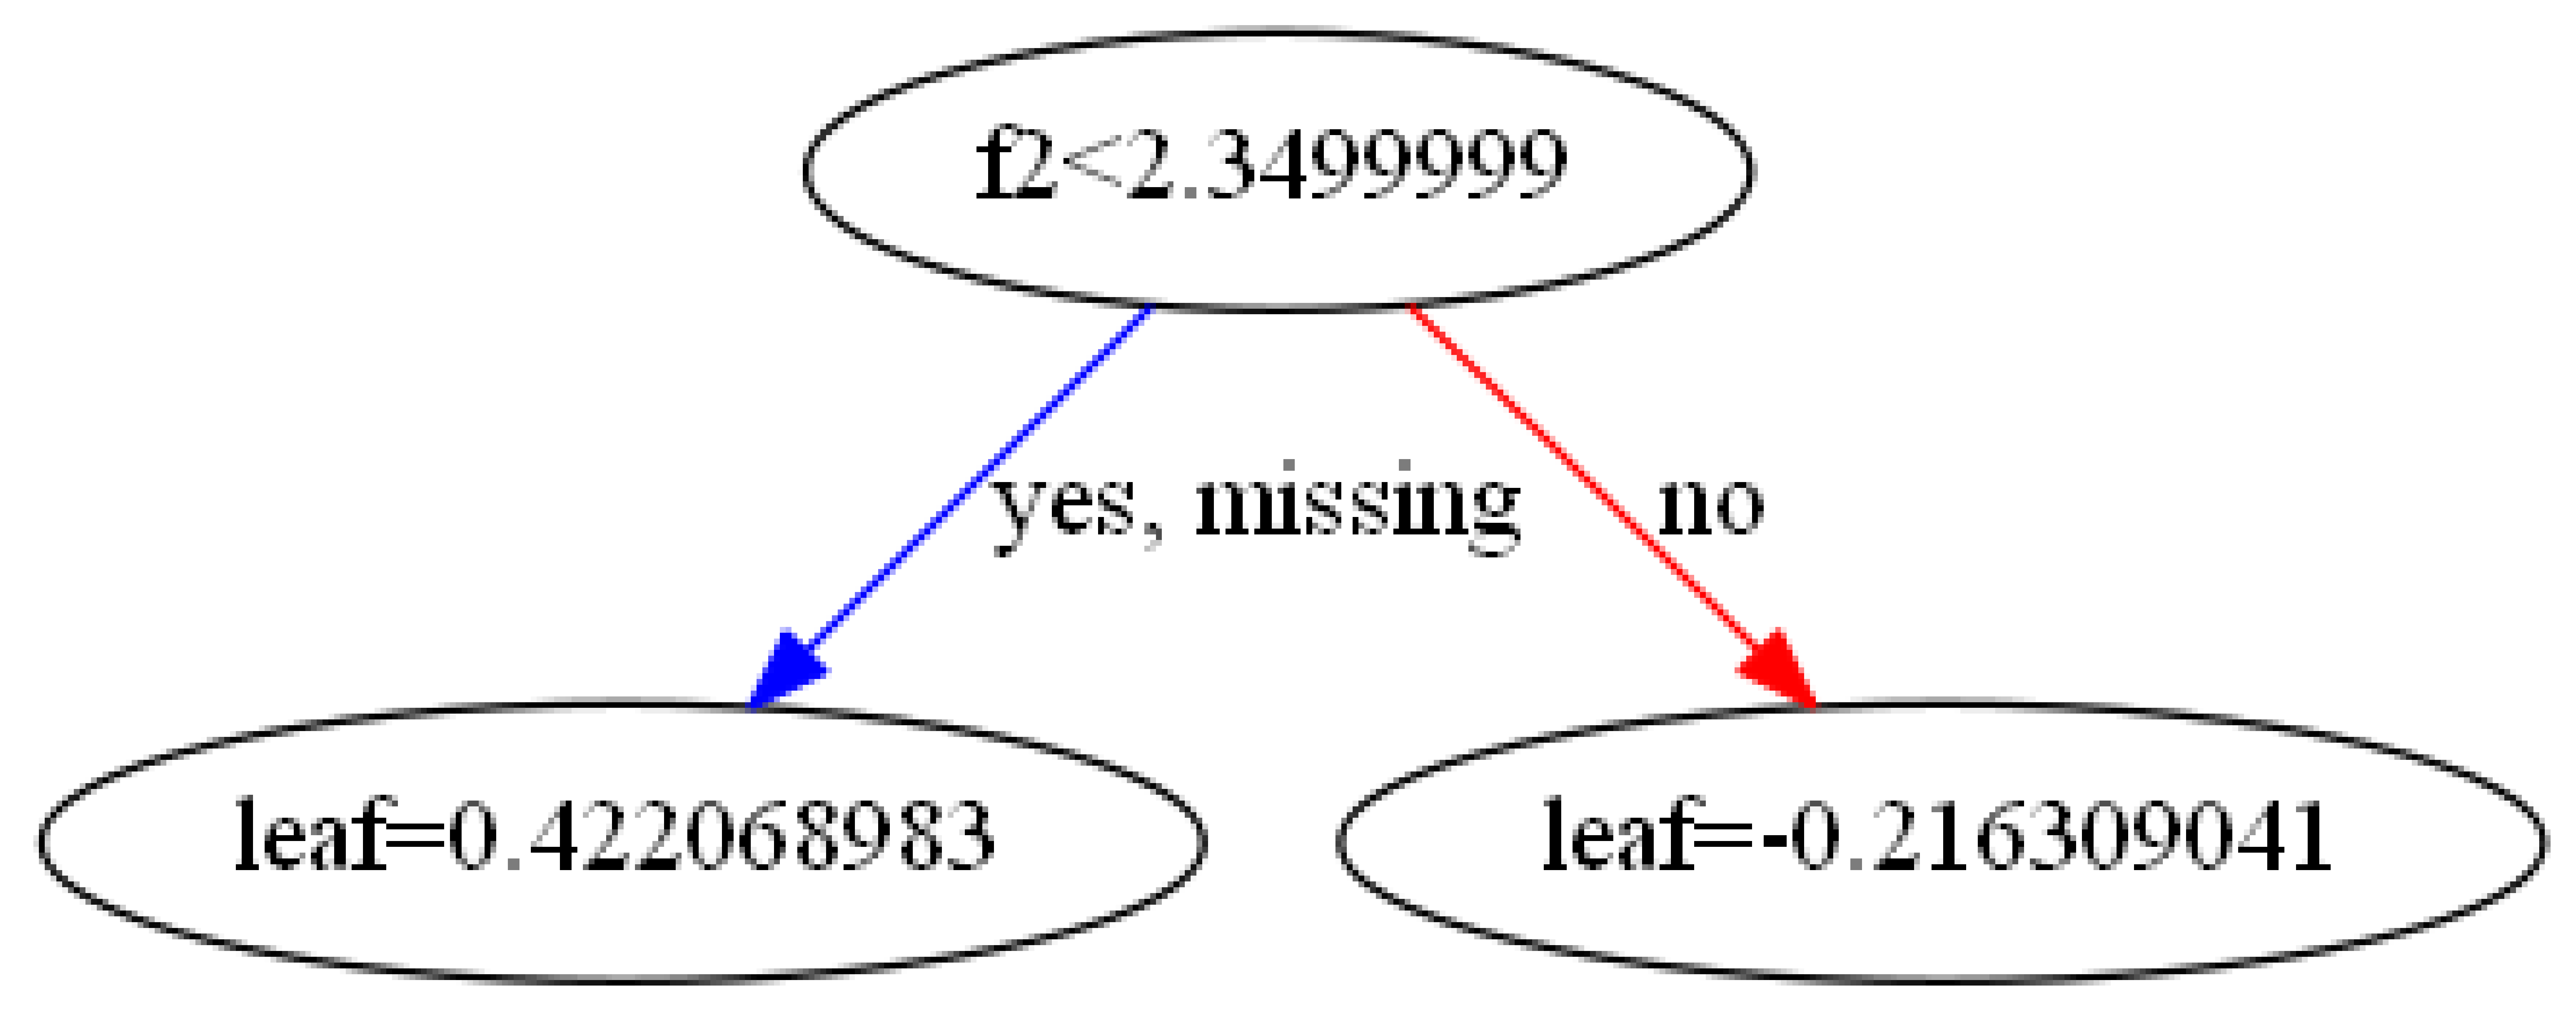

In [3]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/release/bin/'
import matplotlib.pyplot as plt 
from xgboost import plot_tree

plot_tree(model2,num_trees=0)
fig = plt.gcf()
fig.set_size_inches(150,200)

plt.show

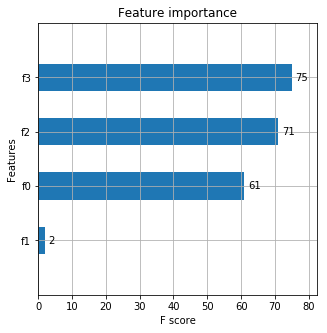

In [30]:
import matplotlib.pyplot as plt 
from xgboost import plot_importance
fig,ax = plt.subplots(figsize=(5,5))
plot_importance(model2,height=0.5,max_num_features=0,ax=ax)
plt.show()

In [ ]:
from sklearn import cross_validation,metrics
from sklearn.grid_search import GridSearchCV